ses 2 1
ses 2 2
ses 2 3
ses 2 4
ses 2 5
ses 2 6
ses 2 7
ses 2 8
ses 2 9
ses 2 10
ses 2 11
ses 2 12
ses 3 1
ses 3 2
ses 3 3
ses 3 4
ses 3 5
ses 3 6
-------------------------
 error run ses 3 7


ses 3 8
ses 3 9
-------------------------
 error run ses 3 10


ses 3 11
ses 3 12
ses 4 1
-------------------------
 error run ses 4 2


ses 4 3
ses 4 4
ses 4 5
ses 4 6
ses 4 7
ses 4 8
ses 4 9
ses 4 10
ses 4 11
ses 4 12
mean prob of all feedback TRs=0.5694760408895934
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9357
Date:                Mon, 28 Jun 2021   Prob (F-statistic):              0.334
Time:                        22:21:49   Log-Likelihood:                -462.22
No. Observations:                1980   AIC:                   

Text(0.5, 1.0, 'perfect_trials')

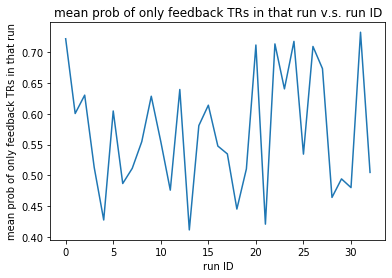

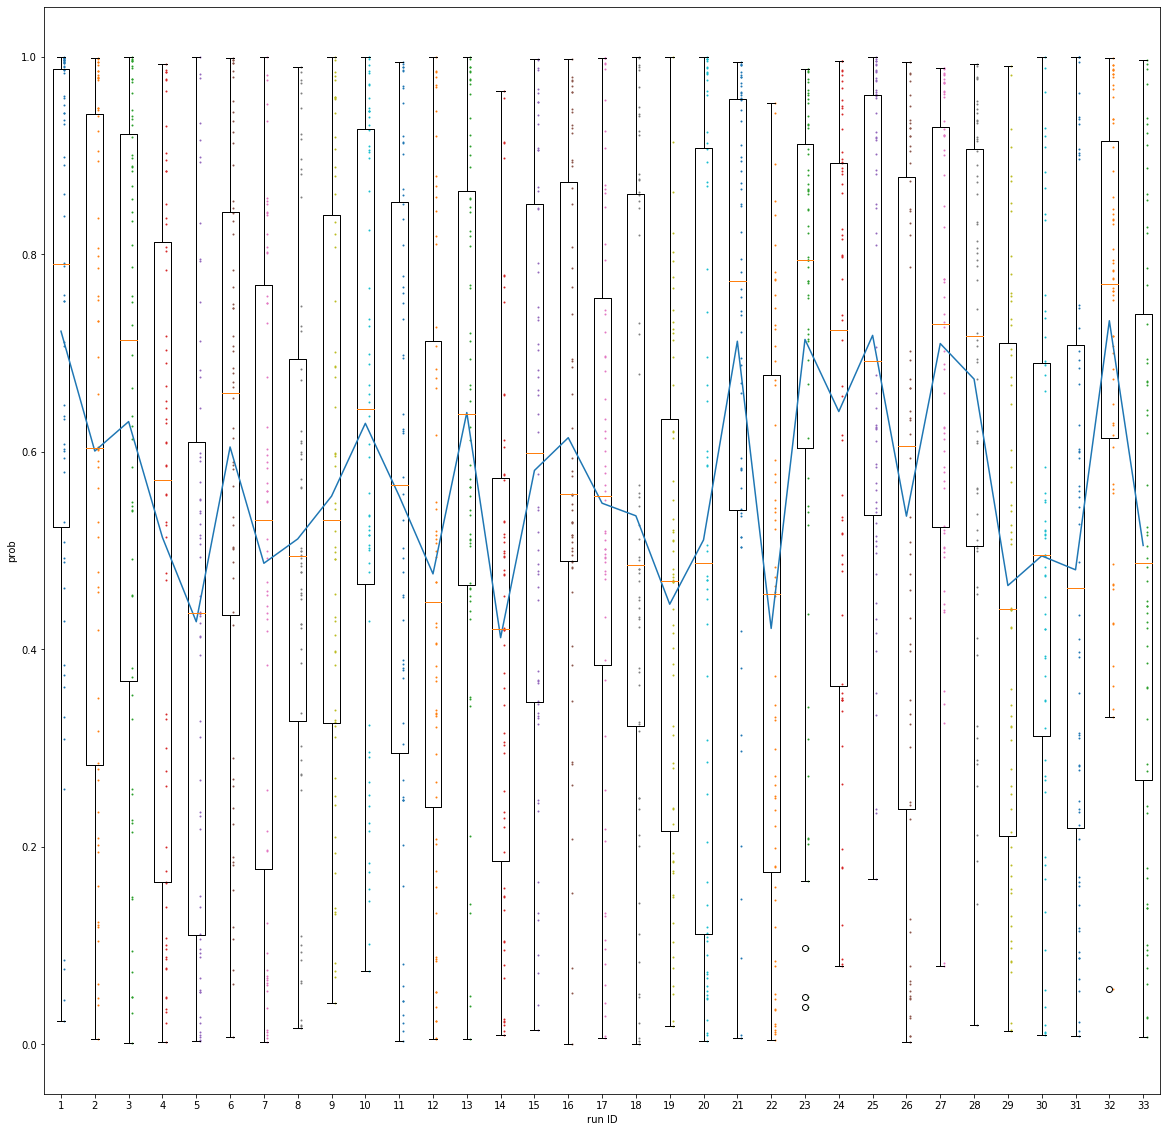

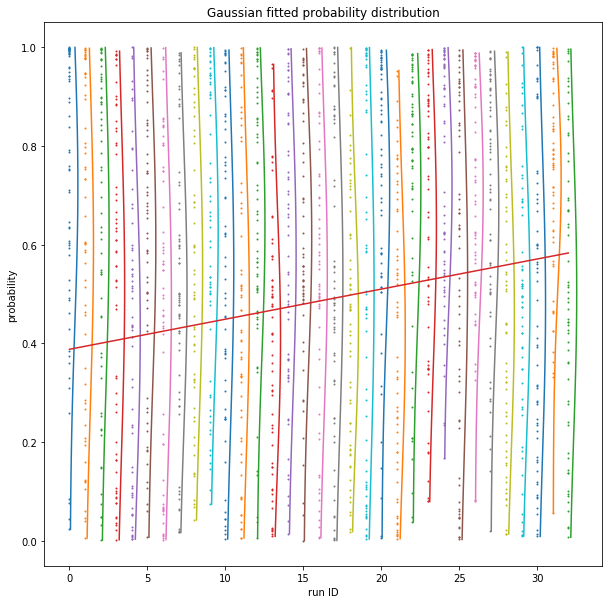

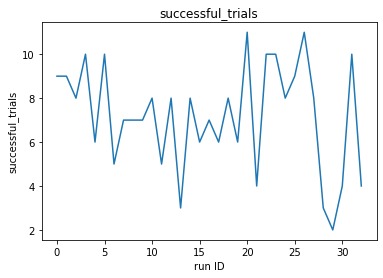

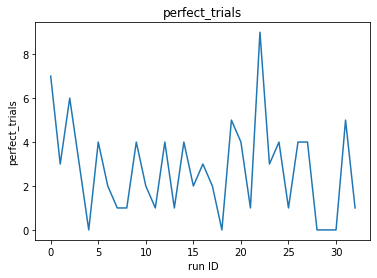

In [46]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# sub='sub004'
# ls=[]
# probs=[]
# for curr_ses in range(2,5):
#     # for currRun in range(1,11):
#     currRun=0
#     while True:
#         currRun+=1
#         try:          
#             history=pd.read_csv(f"/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/subjects/{sub}/ses{curr_ses}/feedback/{sub}_{currRun}_history.csv")            
#             l = list(history[history['states']=="feedback"]['B_prob'])
#             ls.append(np.mean(l))
#             # print(np.mean(l))
#             if len(probs)==0:
#                 probs = np.expand_dims(l,0)
#             else:
#                 probs = np.concatenate([probs,np.expand_dims(l,0)],axis=0) 
#             print(f"ses {curr_ses} {currRun}")            
#         except:
#             print(f"-------------------------\n error run ses {curr_ses} {currRun}\n\n")            
#         if currRun>15:
#             break
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sub='sub004'
ls=[]
probs=[]
successful_trials=[]
perfect_trials=[]
perfect_trials
for curr_ses in range(2,5):
    # for currRun in range(1,11):
    currRun=0
    while True:
        currRun+=1
        try:          
            history=pd.read_csv(f"/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/subjects/{sub}/ses{curr_ses}/feedback/{sub}_{currRun}_history.csv")            
            l = list(history[history['states']=="feedback"]['B_prob'])
            # print(np.mean(l))
            if len(l)<60:
                print(f"-------------------------\n error run ses {curr_ses} {currRun}\n\n")
                continue
                l = l+[np.nan]*(60-len(l))
                
            successful_trials.append(list(history['successful_trials'])[-1])
            perfect_trials.append(list(history['perfect_trials'])[-1])
            ls.append(np.mean(l))
            if len(probs)==0:
                probs = np.expand_dims(l,0)
            else:
                probs = np.concatenate([probs,np.expand_dims(l,0)],axis=0) 
            print(f"ses {curr_ses} {currRun}")            
        except:
            pass
        if currRun>15:
            break
            
_=plt.figure()
plt.plot(ls)
plt.xlabel("run ID")
plt.ylabel("mean prob of only feedback TRs in that run")
plt.title("mean prob of only feedback TRs in that run v.s. run ID")
print(f"mean prob of all feedback TRs={np.mean(ls)}")





import seaborn as sns
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(x=probs)
# np.expand_dims(l,0).shape
# probs.shape
# sns.boxplot(probs)
_=plt.figure(figsize=(20,20))
_=plt.boxplot(probs.T)
for currRun in range(len(probs)):
    plt.scatter([currRun+1+0.1]*60,probs[currRun],s=1)
_=plt.xlabel("run ID")
_=plt.ylabel("prob")
_=plt.plot(np.arange(1,len(probs)+1),ls)





import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

y = probs.reshape(np.prod(probs.shape))
X=[]
for currRun in range(1,len(probs)+1):
    X+=[currRun]*60

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print("Ordinary least squares")



def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_fit(y=[1,2,3,4],x=1):
    y_values = np.linspace(min(y), max(y), 120)    
    mu=np.mean(y)
    sig=np.std(y)
    #plt.text(x+0.04, mu, 'mu={0:.2f}\nsig={1:.2f}'.format(mu,sig), fontsize=12)
    plt.plot(x+0.04+0.5*gaussian(y_values, mu, sig),y_values)


_=plt.figure(figsize=(10,10))
for currRun in range(len(probs)):
    plt.scatter([currRun]*60,probs[currRun],s=1)
    gaussian_fit(y=probs[currRun],x=currRun)
b=0.0061
const=0.3880

plt.plot(np.arange(len(probs)),np.arange(len(probs))*b+const)
plt.xlabel("run ID")
plt.ylabel("probability")
plt.title("Gaussian fitted probability distribution")


plt.figure()
plt.plot(np.arange(len(probs)),successful_trials)
plt.xlabel("run ID")
plt.ylabel("successful_trials")
plt.title("successful_trials")




plt.figure()
plt.plot(np.arange(len(probs)),perfect_trials)
plt.xlabel("run ID")
plt.ylabel("perfect_trials")
plt.title("perfect_trials")


In [68]:
adaptiveThreshold=pd.read_csv(f"/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/subjects/{sub}/adaptiveThreshold.csv")            
# plt.plot(adaptiveThreshold['successful_trials'])

feedback_errors=[]
for curr_ses in [2,3,4]:
    runRecording = pd.read_csv(f"/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/subjects/{sub}/ses{curr_ses}/runRecording.csv")

    feedback_error = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='feedback_error'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
    for i in feedback_error:
        feedback_errors.append([curr_ses,i])
        print(f"curr_ses={curr_ses},scan={i}")


curr_ses=3,scan=9
curr_ses=3,scan=12
curr_ses=4,scan=4


In [69]:
adaptiveThreshold = adaptiveThreshold.drop([18,21,25])

Text(0.5, 1.0, 'perfect_trials')

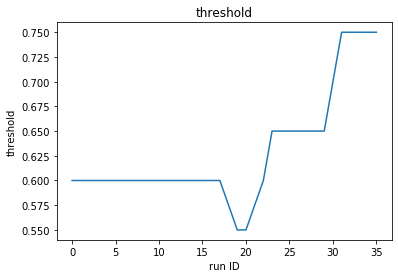

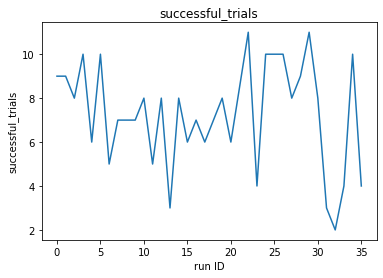

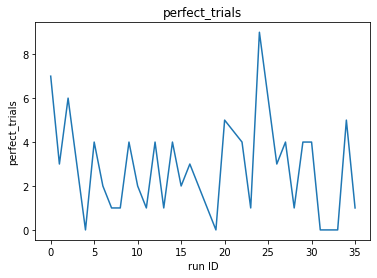

In [70]:
plt.figure()
plt.plot(adaptiveThreshold['threshold'])
plt.xlabel("run ID")
plt.ylabel("threshold")
plt.title("threshold")


plt.figure()
plt.plot(adaptiveThreshold['successful_trials'])
plt.xlabel("run ID")
plt.ylabel("successful_trials")
plt.title("successful_trials")

plt.figure()
plt.plot(adaptiveThreshold['perfect_trials'])
plt.xlabel("run ID")
plt.ylabel("perfect_trials")
plt.title("perfect_trials")